# Customere Churn Prediction Using Artificial Neural Network

## Importing Necessory Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import tensorflow as tf
from tensorflow import keras

## Read and know the shape of dataset

In [4]:
df=pd.read_csv("churn2.csv")
df.shape

(10000, 14)

In [5]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Exploration

In [6]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Pre Processing and Transformation

In [8]:
def pr(df):
  for col in df:
    print(f"{col} : {df[col].unique()}")

In [9]:
for col in df:
  print(f"{col}: {df[col].dtypes}")

CreditScore: int64
Geography: object
Gender: object
Age: int64
Tenure: int64
Balance: float64
NumOfProducts: int64
HasCrCard: int64
IsActiveMember: int64
EstimatedSalary: float64
Exited: int64


In [10]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df['Gender'].replace({"Male":0,"Female":1},inplace=True)

In [12]:
pr(df)

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

## Scaling Dataset

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm , classification_report as cr

In [14]:
cols_to_scale=['CreditScore','Age','Balance','EstimatedSalary']
scale=MinMaxScaler()
df[cols_to_scale]=scale.fit_transform(df[cols_to_scale])

In [15]:
df.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9385,0.674,Germany,0,0.351351,8,0.380107,2,1,1,0.008882,0
5714,0.408,France,1,0.283784,10,0.000000,2,1,1,0.091911,0
1112,0.680,France,1,0.324324,3,0.368987,2,0,0,0.354029,0


## Using get_dummies create dummy of text columns

In [16]:
df1=pd.get_dummies(data=df,columns=["Geography"]).replace({True:1,False:0})
df1.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
9550,0.838,1,0.297297,9,0.533567,1,1,1,0.252806,0,1,0,0
5135,0.336,0,0.297297,4,0.000000,2,0,1,0.972118,0,1,0,0
4033,0.564,0,0.405405,6,0.502460,1,1,0,0.321701,1,0,1,0


## Splitting dataset into training and testing part

In [17]:
x=df1.drop(columns="Exited")
y=df1[['Exited']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [18]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 12), (2000, 12), (8000, 1), (2000, 1))

## Create Artificial neural network to classify the churn 

In [20]:
model=keras.Sequential([
    keras.layers.Dense(12,input_shape=(12,),activation="relu"),
    keras.layers.Dense(8,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 0.5629 - accuracy: 0.7676
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4936 - accuracy: 0.7961
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4768 - accuracy: 0.7979
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4669 - accuracy: 0.8018
Epoch 5/50
250/250 [==============================] - 1s 4ms/step - loss: 0.4599 - accuracy: 0.8037
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4516 - accuracy: 0.8054
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4439 - accuracy: 0.8101
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4369 - accuracy: 0.8105
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4315 - accuracy: 0.8151
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4274 - accuracy: 0.8171

## Got an accuracy of 85 percent

In [21]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.3730 - accuracy: 0.8445


[0.3729817271232605, 0.8445000052452087]

In [25]:
yp=model.predict(x_test)

63/63 [==============================] - 0s 1ms/step


In [26]:
l=[]
for i in yp:
  if i>0.5:
    l.append(1)
  else:
    l.append(0)

In [28]:
l[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [29]:
y_test[:10]

,Exited
7054,0
442,0
3954,0
2288,0
3196,0
6178,0
8351,0
5658,1
2065,0
413,1


## Checking accuracy , precision , recall and f1 score of model 

Text(33.22222222222222, 0.5, 'truth')

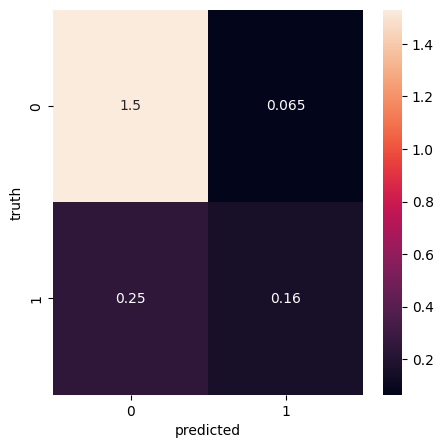

In [39]:
cmm=cm(y_test,l)/1000
plt.figure(figsize=(5,5))
sb.heatmap(cmm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")


In [36]:
print(cr(y_test,l))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1595
           1       0.71      0.39      0.51       405

    accuracy                           0.84      2000
   macro avg       0.79      0.68      0.71      2000
weighted avg       0.83      0.84      0.83      2000



**Accuracy of model**

In [45]:
round((1.5+0.16)/(1.5+0.16+0.25+0.065),2)

0.84

**Precision for 0 class**

In [43]:
round((1.5)/(1.5+0.25),2)

0.86

**Precision for 1 class**

In [48]:
round((0.16)/(0.065+0.16),2)

0.71

**Recall for 0**

In [49]:
1.5/(1.5+0.065)

0.9584664536741214

**Recall for 1**

In [50]:
(0.16)/(0.16+0.25)

0.39024390243902435